In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode 

data = pd.read_csv(r'../karthik.csv')

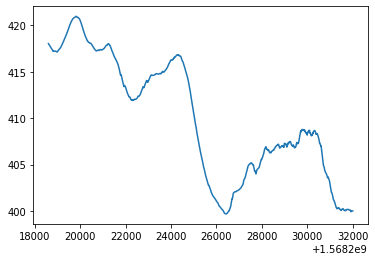

In [19]:
data['ave'] = data['CO2'].rolling(10000).mean()
plt.plot(data['EPOCH_TIME'],data['ave'])

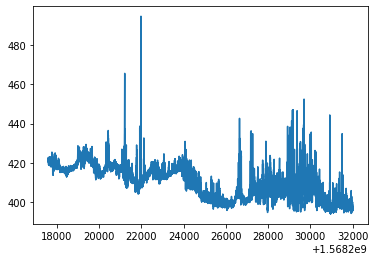

0                NaN
1                NaN
2         420.597989
3         420.684587
4         420.966916
             ...    
144005    396.605201
144006    396.176012
144007    395.939829
144008    395.883109
144009    396.251449
Name: CO2, Length: 144010, dtype: float64
394.00342069
494.62412466
398.1000898925
422.50412710049994
144010
True
True
True


C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


7201
7201


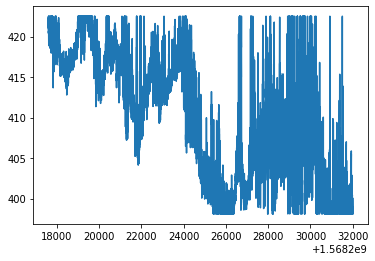

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 17 11:41:13 2019

@author: Karthik

Topic: centered moving average & spike elimination
"""

#import pandas as pd
#import matplotlib.pyplot as plt
#from statistics import mode 
#import quickspikes as qs


#data = pd.read_csv(r'C:\Users\Karthik\Desktop\VGRA\DR_BJ_PROJECT\MACHINE_LEARNING_APPLICATION\PYTHON_CODES\AARON_DATA\karthik_oct16_1weekchallenge.csv')
data_array = data.values

#visualize the data
#Suggestion: Don't have separate names for each variable. You already have a dataframe which is well organized.
anem_y = data['ANEM_Y']
epoch_time = data['EPOCH_TIME']

#I want it to be CO2 Vs Epoch Time.
plt.plot(data['EPOCH_TIME'][0:len(data)], data['CO2'][0:len(data)])       # Mistake - Don't put them in brackets
plt.show()

# Below is the centered moving average. The number in the brackets represent the number
# of values taken to average. Here, we take the average of 3 values.
data['ave'] = data['CO2'].rolling(10).mean()

# Now for the trailing moving average[DO THIS LATER].

'''
# Perform Spike Elimination using library.
det = qs.detector(1000, 30)
times = det.send(data[0:1000])

f_times = qs.filter_times(times, 30, data.size - 270)
spikes = qs.peaks(data, f_times, 30, 270)
times, aligned = qs.realign_spikes(f_times, spikes, upsample=3, jitter=4)
'''
# Perform Spike Elimination using for loop.

print(data['CO2'][0:len(data)].min())
print(data['CO2'][0:len(data)].max())

# Use Gaussian strategy where you take all values that belong to the range 
q1_CO2 = data['CO2'].quantile(0.05)
print(q1_CO2)   #422.5

q3_CO2 = data['CO2'].quantile(0.95)
print(q3_CO2)   #398.1

# Find location of points greater than q3 value and replace all those values with q3 value.
print(len(data['CO2']))

for i in range(0, 3):
    if(10 > 8):
        print("True")
    elif(10 < 8):
        print("True")

count_q1 = 0
count_q3 = 0
for i in range(0, len(data['CO2'])):
    if(data['CO2'][i] > q3_CO2):
        data['CO2'][i] = q3_CO2
        count_q3 += 1
        data['CO2'][i] = q3_CO2
    
    elif(data['CO2'][i] < q1_CO2):
        count_q1 += 1
        data['CO2'][i] = q1_CO2

print(count_q3)
print(count_q1)

# Plot new graph:
plt.plot(data['EPOCH_TIME'][0:len(data)], data['CO2'][0:len(data)])       # Mistake - Don't put them in brackets
plt.show()